In [11]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#loading the dataset
data = pd.read_csv("C:/Users/HP/Downloads/titanic.csv")

In [13]:
#viewing the first 5 rows of the dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#viewing the last 5 rows of the dataframe
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
#checking the number of rows and columns
data.shape

(891, 12)

In [17]:
#generating a summary statistics table for the dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#generating a concise summary of the structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#counting the number of missing values (NaN or None) in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#displaying the data types of each column in the dataframe
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
# drop the "Cabin" column from the dataframe
data = data.drop(columns='Cabin', axis=1)

In [23]:
# replacing the missing values in "Age" column with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
# drop other unneccassary columns
data = data.drop(['PassengerId','Name','Ticket'], axis =1, inplace=True)

In [24]:
# replacing the missing values in "Fare" column with mean value
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [29]:
# finding the mode value of "Embarked" column
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [31]:
print(data['Embarked'].mode()[0])


S


In [32]:
# replacing the missing values in "Embarked" column with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [34]:
# check the number of missing values in each column
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
# finding the number of people survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

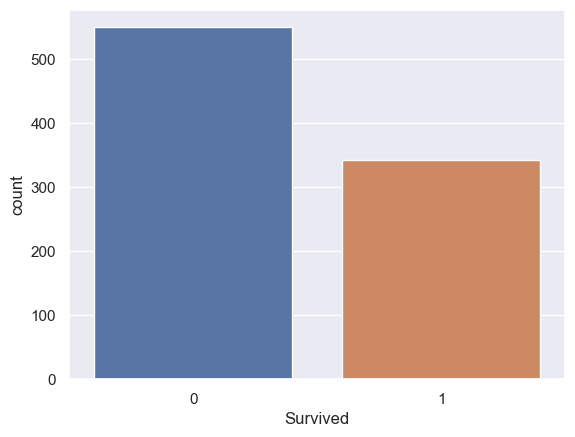

In [38]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=data)

In [40]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

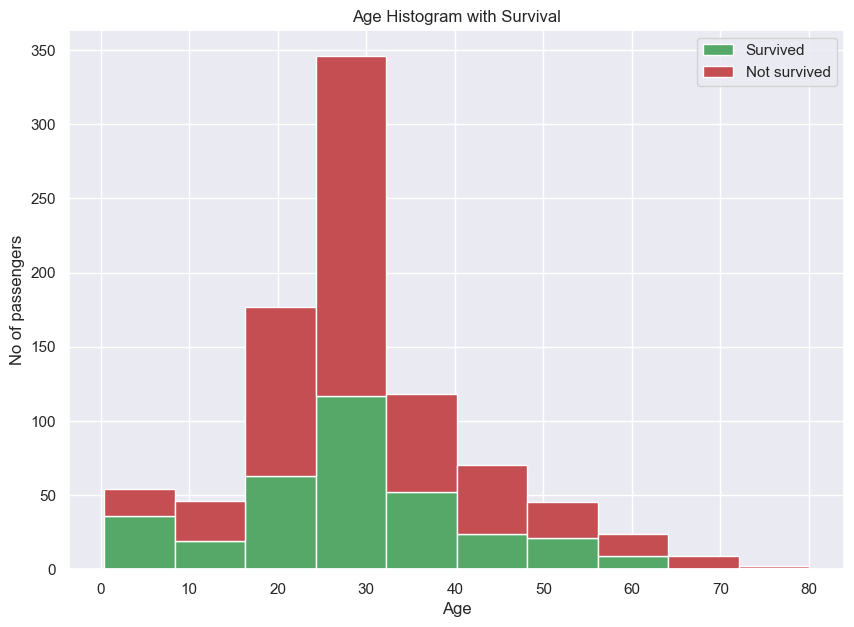

In [41]:
#creating a histogram for age column
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

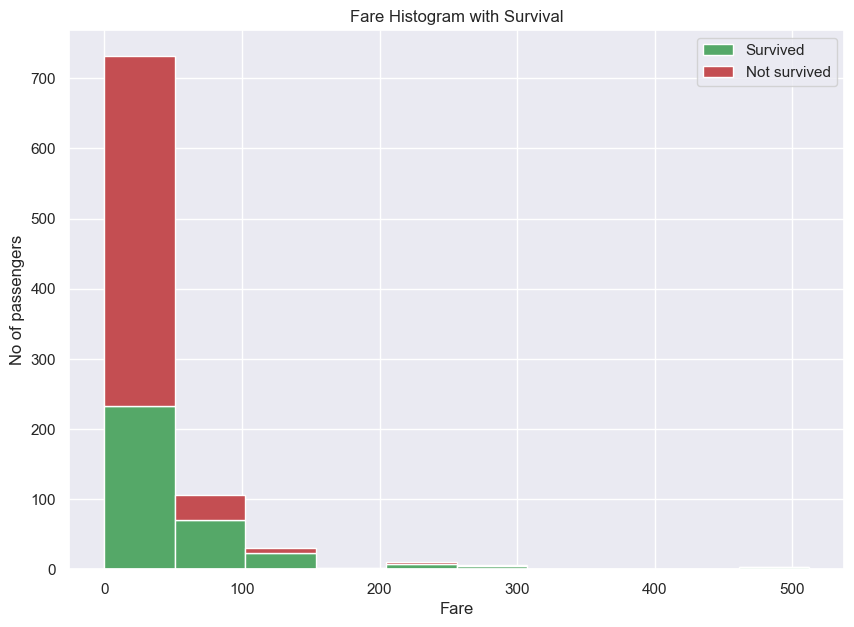

In [42]:
#creating a histogram for fare column with survival
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<AxesSubplot:xlabel='Sex', ylabel='count'>

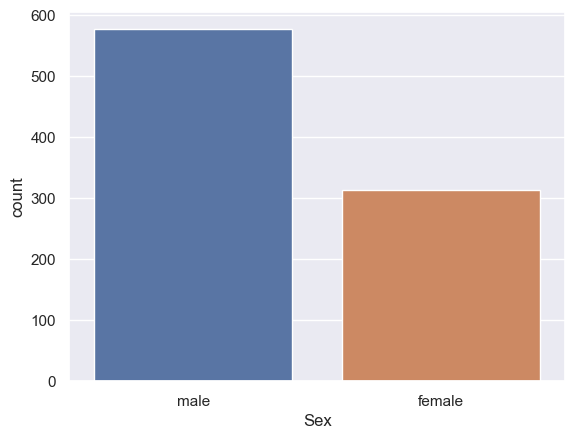

In [44]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=data)


<AxesSubplot:xlabel='Sex', ylabel='count'>

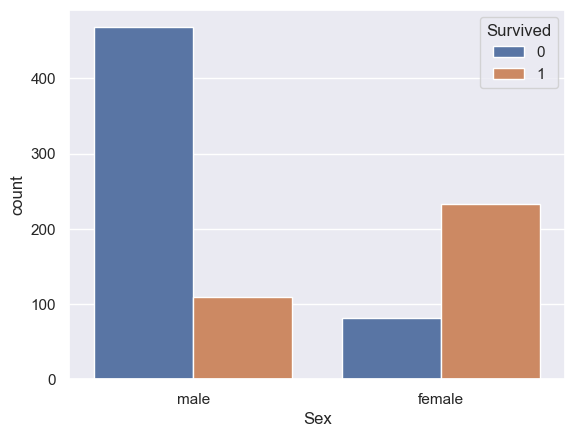

In [46]:
#plotting number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=data)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

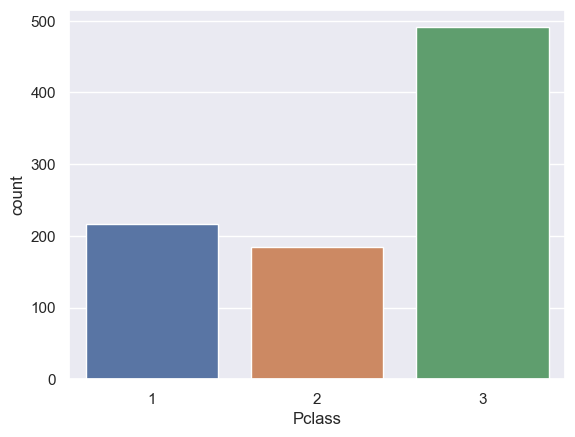

In [47]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=data)

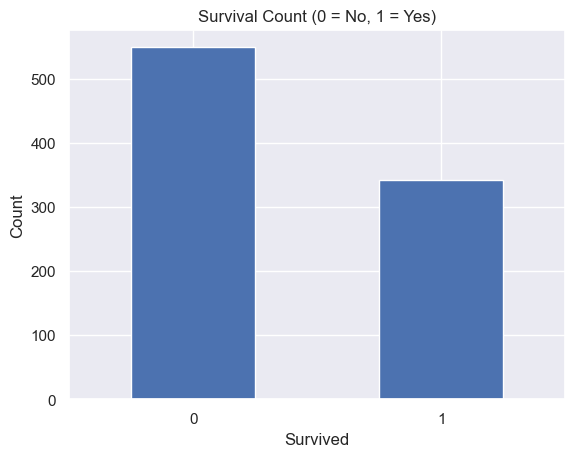

In [49]:
column = 'Survived'

# Create a bar chart
survival_counts = data[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()